In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('iris_flowers.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [4]:
data.sepal_width.value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: sepal_width, dtype: int64

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


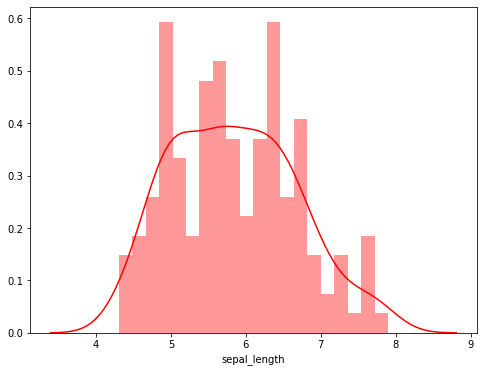

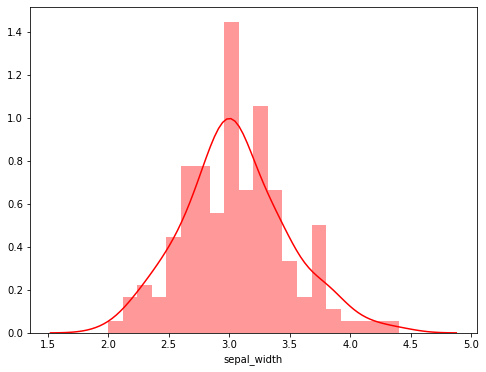

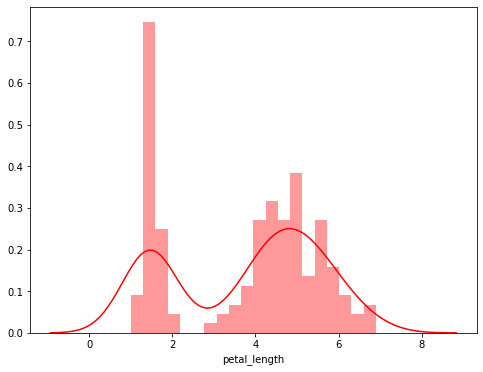

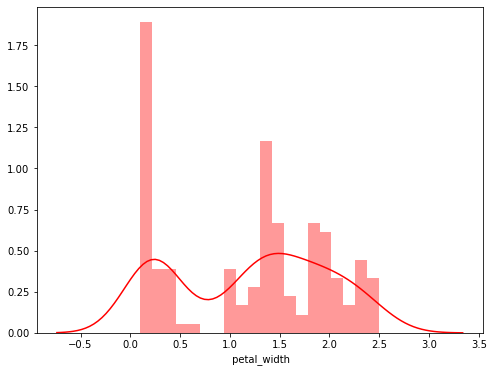

In [6]:
for x in data.columns:
    if(x=='class'):
        break
    plt.figure(figsize=(8,6))
    sns.distplot(data[x],color='red',bins=20)

In [7]:
sns.regplot(x = data.petal_length,y=data.petal_width)

AttributeError: 'DataFrame' object has no attribute 'petal_width'

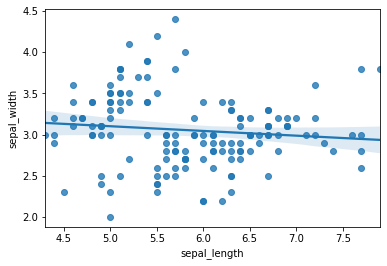

In [8]:
sns.regplot(x = data.sepal_length,y=data.sepal_width)

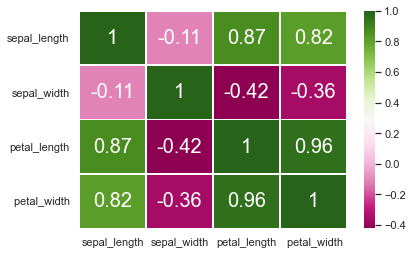

In [9]:
#Correlations
sns.set(font_scale=1)
ax=sns.heatmap(data.corr(),annot=True,annot_kws={'size':20},cmap='PiYG',linewidths=.5)

In [10]:
training=pd.DataFrame()
training=data.copy()

In [11]:
training.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [12]:
#Need to conver the class into integer as machine leqrnig woked onlu numeric error
from sklearn.preprocessing import LabelEncoder
le_1=LabelEncoder()
training['class']=le_1.fit_transform(training['class'])

In [13]:
le_1.classes_
#0=Setosa
#1=

array(['iris_setosa', 'iris_versicolor', 'iris_virginica'], dtype=object)

In [14]:
training.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training.drop('class',axis=1),training['class'],random_state=101,test_size=0.2)

In [16]:
y_test.value_counts()

1    12
0    10
2     8
Name: class, dtype: int64

In [17]:
print(x_train.shape,y_train.shape)
print(y_test.shape,x_test.shape)


(120, 4) (120,)
(30,) (30, 4)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
classfier1=KNeighborsClassifier(n_neighbors=5,p=2)
classfier1.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
classfier1.score(x_train,y_train)

0.9666666666666667

In [20]:
classfier1.score(x_test,y_test)

1.0

In [21]:
from sklearn.metrics import confusion_matrix as cm
y_pred=classfier1.predict(x_test)
cm(y_test,y_pred)
# 10 data from 1st category has been coreclty classfied,12 data from 2nd category has been correclty classfied,8 data from 3rd category has ben correctll
#classfied and thast we have accuracy fo 1.0

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  8]], dtype=int64)

In [22]:
from sklearn.svm import SVC
classfier2=SVC()
classfier2.fit(x_train,y_train)

SVC()

In [23]:
classfier2.score(x_train,y_train)

0.95

In [24]:
classfier2.score(x_test,y_test)

0.9666666666666667

In [25]:
y_pred=classfier2.predict(x_test)
cm(y_test,y_pred)
# 10 data from 1st category has been coreclty classfied,12 data from 2nd category has been correclty classfied,1 data from 3rd category has been wrongly 
#classfied as 2nd category and that we have accuracy fo 1.0

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier(n_estimators=2)
classifier3.fit(x_train,y_train)
classifier3.score(x_train,y_train)

0.95

In [28]:
classifier3.score(x_test,y_test)

0.9333333333333333

In [30]:
y_pred=classifier3.predict(x_test)
cm(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  2,  6]], dtype=int64)